download https://www.kaggle.com/mahmoudreda55/satellite-image-classification?select=data

- menggunakan arsitektu vgg16

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
img_size = 128
def preprocess(image:np.array)->np.array:
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))      # untuk CNN karena bentuknya tetap, jadi perlu disamakan dulu bentuknya
    img = np.array(img)
    # img = img.astype("float32")
    img = img/255.0
    return img

In [3]:
path = "images"
x = []
y = []
for label in os.listdir(path):
    print(label)
    subdir = os.path.join(path, label)
    for fileName in os.listdir(subdir):
        # print(fileName)     # untuk nama
        # print(os.path.join(subdir, fileName))   # ini untuk mendapatkan path lengkapnya
        filePath = os.path.join(subdir, fileName)
        img = cv2.imread(filePath)
        img = preprocess(img)
        x.append(img)
        y.append(label)


desert
cloudy
green_area
water


In [4]:
x = np.array(x)
y = np.array(y)
x.shape, y.shape

# ((5631, 128, 128, 3), (5631,))
# 5631      -> jumlah gambar
# 128, 128  -> size gambar
# 3         -> channel rgb

((5631, 128, 128, 3), (5631,))

In [5]:
y[:10]

array(['desert', 'desert', 'desert', 'desert', 'desert', 'desert',
       'desert', 'desert', 'desert', 'desert'], dtype='<U10')

In [6]:
y[-1]

'water'

In [7]:
y[:10]

array(['desert', 'desert', 'desert', 'desert', 'desert', 'desert',
       'desert', 'desert', 'desert', 'desert'], dtype='<U10')

karena y masih dalam bentuk, harus di encode dulu

In [8]:
ec = OneHotEncoder()
y = ec.fit_transform(y.reshape(-1,1)).toarray()

In [9]:
y[-1]

array([0., 0., 0., 1.])

In [10]:
y.shape
# (5631, 4) -> jadi 4 dimensi

(5631, 4)

In [11]:
n_class = y.shape[-1]   # ambil kelasnya ada berapa
print(n_class)

4


In [12]:
lr = 0.01           # learning rate
n_epochs = 50       # banyaknya percobaan, 50
batch_size = 32     # diitearsi setiap satu eksekusi langsung di ambil 32 gambar, awalnya 32 gambar

In [13]:
model = tf.keras.Sequential()

ikutin vgg16

In [14]:
# # Convolutional 1
# model.add(tf.keras.layers.Conv2D(input_shape=(img_size, img_size, 3), filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# # Convolutional 2
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# # Convolutional 3
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# # masuk ke fully connected layer
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=100, activation='relu'))
# model.add(tf.keras.layers.Dense(units=100, activation='relu'))
# model.add(tf.keras.layers.Dense(units=n_class, activation='softmax'))

# model.summary()

In [15]:
# Convolutional 1
model.add(tf.keras.layers.Conv2D(input_shape=(img_size, img_size, 3), filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Convolutional 2
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Convolutional 3
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# masuk ke fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=n_class, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

In [16]:
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(x, y, verbose=1, epochs=n_epochs, batch_size=batch_size)

Epoch 1/50
176/176 [==============================] - 340s 2s/step - loss: 1.1454 - accuracy: 0.4125
Epoch 2/50
176/176 [==============================] - 343s 2s/step - loss: 0.7553 - accuracy: 0.5660
Epoch 3/50
176/176 [==============================] - 345s 2s/step - loss: 0.6656 - accuracy: 0.6438
Epoch 4/50
176/176 [==============================] - 344s 2s/step - loss: 0.6260 - accuracy: 0.6592
Epoch 5/50
176/176 [==============================] - 346s 2s/step - loss: 0.5890 - accuracy: 0.6969
Epoch 6/50
176/176 [==============================] - 348s 2s/step - loss: 0.5133 - accuracy: 0.7381
Epoch 7/50
176/176 [==============================] - 350s 2s/step - loss: 0.5090 - accuracy: 0.7379
Epoch 8/50
176/176 [==============================] - 347s 2s/step - loss: 0.5003 - accuracy: 0.7567
Epoch 9/50
176/176 [==============================] - 342s 2s/step - loss: 0.4976 - accuracy: 0.7608
Epoch 10/50
176/176 [==============================] - 342s 2s/step - loss: 0.4725 - accura

In [76]:
# assign location
path_model='a-satellite_image_classification_model/model.h5'
path_model_weight='a-satellite_image_classification_model/weights.h5'
 
# save
model.save(path_model)
model.save_weights(path_model_weight)

print('Model Saved!')

Model Saved!


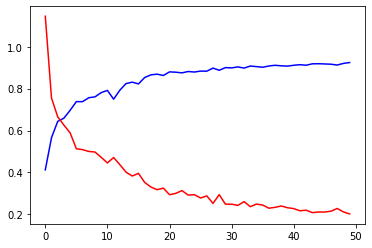

In [74]:
plt.plot(hist.history["accuracy"],'b')
plt.plot(hist.history["loss"],'r')
plt.show()

## Test the model

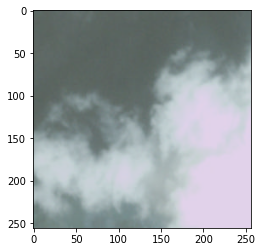

In [68]:
# train_12.jpg
img = cv2.imread('images/cloudy/train_12.jpg')
plt.imshow(img)

In [69]:
img.shape

(256, 256, 3)

In [70]:
# karena bentuknya 3 dimensi, tpi model kita 4 dimensi, maka harus di ubah dulu
img = preprocess(img)
img = np.expand_dims(img, axis=0)
img.shape
# disini udah 4 dimensi

(1, 128, 128, 3)

In [71]:
y_pred = model.predict(img) # bentuk datanya 
y_pred

array([[9.9917173e-01, 8.1464503e-04, 3.1611878e-09, 1.3638593e-05]],
      dtype=float32)

In [72]:
y_pred_dec = ec.inverse_transform(y_pred)
y_pred_dec

array([['cloudy']], dtype='<U10')